<h1>2.Feature engineering</h1>
<p>
    Feature engineering is the process of extracting features (characteristics, qualities, and attributes) 
    from raw data using domain expertise. Predictive models use features to impact results.
</p>

In [1]:
#importing useful libraries
import math
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import plotly.express as px
import plotly.graph_objects as go
sns.color_palette('bright')
sns.set(style='darkgrid',rc = {'figure.figsize':(15,8)})
from plotly.offline import iplot
from sklearn.pipeline import make_pipeline 
%matplotlib inline
print("Ready,set,go....")

Ready,set,go....


In [2]:
#reading training data set
df = pd.read_csv('before_f_e.csv')

In [3]:
#checking head
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
#describing the data
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [6]:
#Checking for  rows with null values
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

            id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                question2  is_duplicate  
105780                                                NaN             0  
201841                                                NaN             0  
363362  My Chinese name is Haichao Yu. What English na...             0  


In [7]:
# Filling the null values with space ' '
df = df.fillna('')

In [8]:
#Checking for  rows with null values
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


<h3>2.1 Basic Feature extraction </h3>

Creating some features

 - ____Common_words____ : Number of common unique words in both Question 1 and Question 2
 - ____Total_words____ :Total num of words in Question 1 + Total num of words in Question 2
 - ____shared_words____ : (common_words)/(Total_words)
 - ____Q1len____ = Length of question 1
 - ____Q2len____ = Length of question 2
 - ____Q1_nwords____ = Number of words in Question 1
 - ____Q2_nwords____ = Number of words in Question 2
 - ____frequency_qid1____ = Frequency of q id1's
 - ____frequency_qid2____ = Frequency of q id2's 
 - ____frequency_q1+q2____ = sum of total  frequency of qid1 and qid2 
 - ____frequency_q1-q2____ = absolute difference of frequency of qid1 and qid2 

<h3>2.1.1 common_words </h3>

In [9]:
#creating a method for finding common unique words in both q1 and q2
def common_words(temp_df):
    set1 = set(map(lambda var: var.lower().strip(), temp_df['question1'].split(" ")))
    set2 = set(map(lambda var: var.lower().strip(), temp_df['question2'].split(" ")))    
    return 1.0 * len(set1 & set2)

In [10]:
#adding feature to the dataframe
df['common_word'] = df.apply(common_words, axis=1)

In [11]:
#checking head
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,common_word
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,10.0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4.0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,4.0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,0.0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,2.0


In [12]:
#describing the added feature
df['common_word'].describe()

count    404290.000000
mean          4.511610
std           3.098656
min           0.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          41.000000
Name: common_word, dtype: float64

<h3>2.1.2 Total_words </h3>

In [13]:
#creating a method for finding the total number of words in q1 and q2
def Total_words(temp_df):
    set1 = set(map(lambda word: word.lower().strip(), temp_df['question1'].split(" ")))
    set2 = set(map(lambda word: word.lower().strip(), temp_df['question2'].split(" ")))    
    return 1.0 * (len(set1) + len(set2))

In [14]:
#adding feature to the data frame
df['Total_words'] = df.apply(Total_words, axis=1)

In [15]:
#checking head
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,common_word,Total_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,10.0,23.0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4.0,20.0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,4.0,24.0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,0.0,19.0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,2.0,20.0


In [16]:
#describing the added feature
df['Total_words'].describe()

count    404290.000000
mean         21.126112
std           8.592622
min           3.000000
25%          15.000000
50%          19.000000
75%          25.000000
max         166.000000
Name: Total_words, dtype: float64

<h3>2.1.3 shared_words </h3>

In [17]:
#creating a method for finding shared words
def shared_words(temp_df):
    set1 = set(map(lambda word: word.lower().strip(), temp_df['question1'].split(" ")))
    set2 = set(map(lambda word: word.lower().strip(), temp_df['question2'].split(" ")))    
    return 1.0 * len(set1 & set2)/(len(set1) + len(set2))

In [18]:
#adding feature to the dataframe
df['share_words'] = df.apply(shared_words, axis=1)

In [19]:
#checking head
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,common_word,Total_words,share_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,10.0,23.0,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4.0,20.0,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,4.0,24.0,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,0.0,19.0,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,2.0,20.0,0.100000


In [20]:
#describing the added feature
df['share_words'].describe()

count    404290.000000
mean          0.223362
std           0.128336
min           0.000000
25%           0.125000
50%           0.217391
75%           0.318182
max           0.500000
Name: share_words, dtype: float64

<h3>2.1.4 Adding lengths of the given questions </h3>

In [21]:
#adding length of q1 and q2 using len() function
df['Q1len'] = df['question1'].str.len() 
df['Q2len'] = df['question2'].str.len()

In [22]:
#checking head
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,common_word,Total_words,share_words,Q1len,Q2len
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,10.0,23.0,0.434783,66,57
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4.0,20.0,0.200000,51,88
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,4.0,24.0,0.166667,73,59
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,0.0,19.0,0.000000,50,65
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,2.0,20.0,0.100000,76,39


In [23]:
#describing the added feature
df['Q1len'].describe()

count    404290.000000
mean         59.536709
std          29.940655
min           0.000000
25%          39.000000
50%          52.000000
75%          72.000000
max         623.000000
Name: Q1len, dtype: float64

In [24]:
#describing the added feature
df['Q2len'].describe()

count    404290.000000
mean         60.108365
std          33.863870
min           0.000000
25%          39.000000
50%          51.000000
75%          72.000000
max        1169.000000
Name: Q2len, dtype: float64

<h3>2.1.5 Number of words </h3>

In [25]:
#adding number of words using lambda function
df['Q1_nwords'] = df['question1'].apply(lambda var: len(var.split(" ")))
df['Q2_nwords'] = df['question2'].apply(lambda var: len(var.split(" ")))

In [26]:
#checking head
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,common_word,Total_words,share_words,Q1len,Q2len,Q1_nwords,Q2_nwords
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,10.0,23.0,0.434783,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4.0,20.0,0.200000,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,4.0,24.0,0.166667,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,0.0,19.0,0.000000,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,2.0,20.0,0.100000,76,39,13,7


In [27]:
#describing the added feature
df['Q1_nwords'].describe()

count    404290.000000
mean         10.944592
std           5.431949
min           1.000000
25%           7.000000
50%          10.000000
75%          13.000000
max         125.000000
Name: Q1_nwords, dtype: float64

In [28]:
#describing the added feature
df['Q2_nwords'].describe()

count    404290.000000
mean         11.185120
std           6.311076
min           1.000000
25%           7.000000
50%          10.000000
75%          13.000000
max         237.000000
Name: Q2_nwords, dtype: float64

<h3>2.1.6 frequency </h3>

In [29]:
#adding frequency features to dataframe using count and groupby 
df['frequency_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
df['frequency_qid2'] = df.groupby('qid2')['qid2'].transform('count')

In [30]:
#checking head
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,common_word,Total_words,share_words,Q1len,Q2len,Q1_nwords,Q2_nwords,frequency_qid1,frequency_qid2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,10.0,23.0,0.434783,66,57,14,12,1,1
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4.0,20.0,0.200000,51,88,8,13,4,1
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,4.0,24.0,0.166667,73,59,14,10,1,1
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,0.0,19.0,0.000000,50,65,11,9,1,1
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,2.0,20.0,0.100000,76,39,13,7,3,1


In [31]:
#describing the added feature
df['frequency_qid1'].describe()

count    404290.000000
mean          2.827609
std           4.487418
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          50.000000
Name: frequency_qid1, dtype: float64

In [32]:
#describing the added feature
df['frequency_qid2'].describe()

count    404290.000000
mean          3.046961
std           6.026871
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         120.000000
Name: frequency_qid2, dtype: float64

In [33]:
#adding more frequency features
df['frequency_q1+q2'] = df['frequency_qid1']+df['frequency_qid2']
df['frequency_q1-q2'] = abs(df['frequency_qid1']-df['frequency_qid2'])

In [34]:
#checking head
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,common_word,Total_words,share_words,Q1len,Q2len,Q1_nwords,Q2_nwords,frequency_qid1,frequency_qid2,frequency_q1+q2,frequency_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,10.0,23.0,0.434783,66,57,14,12,1,1,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4.0,20.0,0.200000,51,88,8,13,4,1,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,4.0,24.0,0.166667,73,59,14,10,1,1,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,0.0,19.0,0.000000,50,65,11,9,1,1,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,2.0,20.0,0.100000,76,39,13,7,3,1,4,2


In [35]:
#describing the added feature
df['frequency_q1+q2'].describe()

count    404290.000000
mean          5.874570
std           9.091068
min           2.000000
25%           2.000000
50%           3.000000
75%           5.000000
max         157.000000
Name: frequency_q1+q2, dtype: float64

In [36]:
#describing the added feature
df['frequency_q1-q2'].describe()

count    404290.000000
mean          1.845715
std           5.187882
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         119.000000
Name: frequency_q1-q2, dtype: float64

<h2> 2.2 Analysing Basic Features </h2>

In [37]:
#creating plots using pandas_profiling
import pandas_profiling as pp
pp.version.__version__

'3.0.0'

In [38]:
from pandas_profiling import ProfileReport
#using minimal report for genrating the html file faster for large datas
profile = ProfileReport(df, minimal=True)
profile.to_file(output_file="afterbasicexcration.html")

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

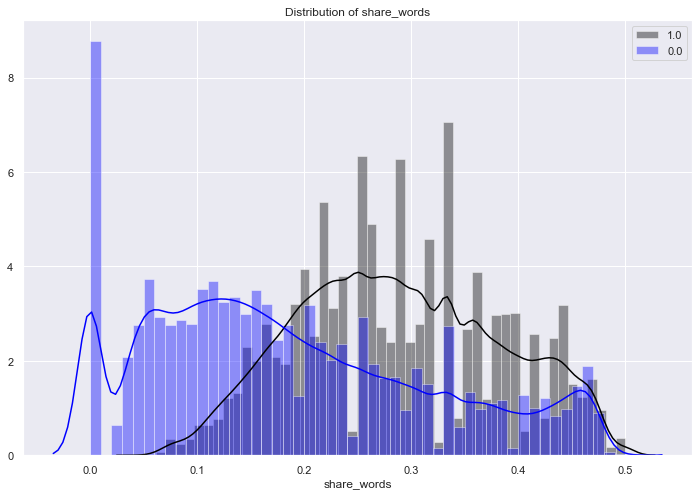

In [39]:
#seeing distrubution
plt.figure(figsize=(12,8))
sns.distplot(df[df['is_duplicate']==1.0]['share_words'],label=1.0,color='black')
sns.distplot(df[df['is_duplicate']==0.0]['share_words'],label=0.0,color='blue')
plt.legend()
plt.title("Distribution of share_words")
plt.show()

<Figure size 864x576 with 0 Axes>

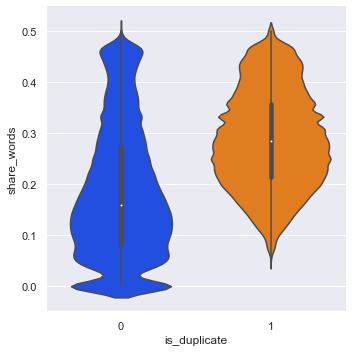

In [40]:
#creating categeory plot
plt.figure(figsize=(12,8))
sns.catplot(x='is_duplicate',y='share_words',data=df,kind='violin',palette='bright')
plt.show()

<Figure size 864x576 with 0 Axes>

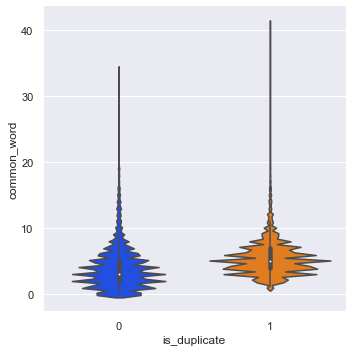

In [41]:
#creating categeory plot 
plt.figure(figsize=(12,8))
sns.catplot(x='is_duplicate',y='common_word',data=df,kind='violin',palette='bright')
plt.show()

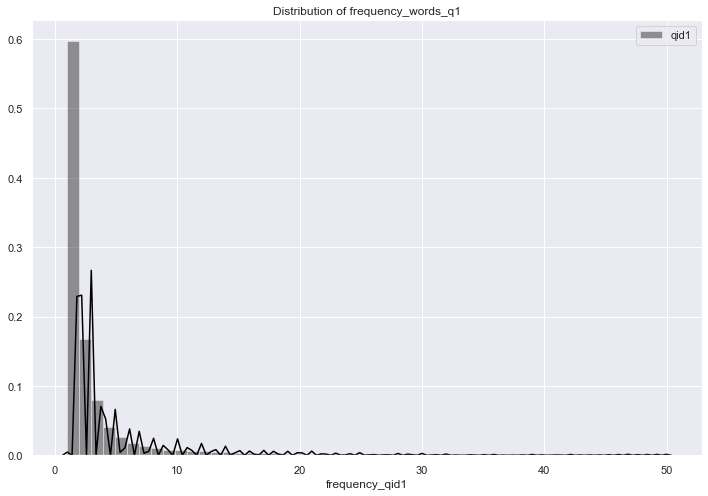

In [42]:
#seeing distrubution
plt.figure(figsize=(12,8))
sns.distplot(df['frequency_qid1'],label='qid1' , color='black')
plt.legend()
plt.title("Distribution of frequency_words_q1")
plt.show()

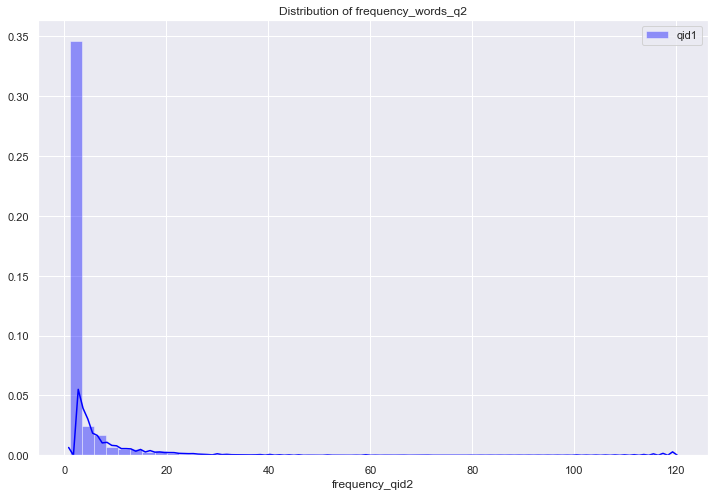

In [43]:
#seeing distrubution
plt.figure(figsize=(12,8))
sns.distplot(df['frequency_qid2'],label='qid1' , color='blue')
plt.legend()
plt.title("Distribution of frequency_words_q2")
plt.show()

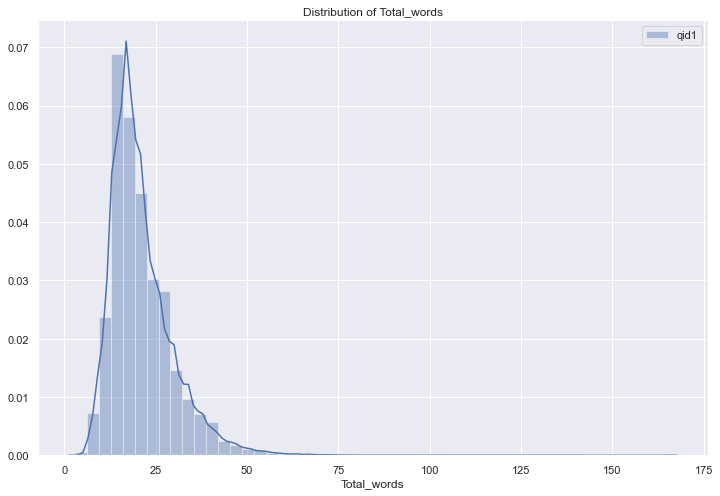

In [44]:
#seeing distrubution
plt.figure(figsize=(12,8))
sns.distplot(df['Total_words'],label='qid1')
plt.legend()
plt.title("Distribution of Total_words")
plt.show()

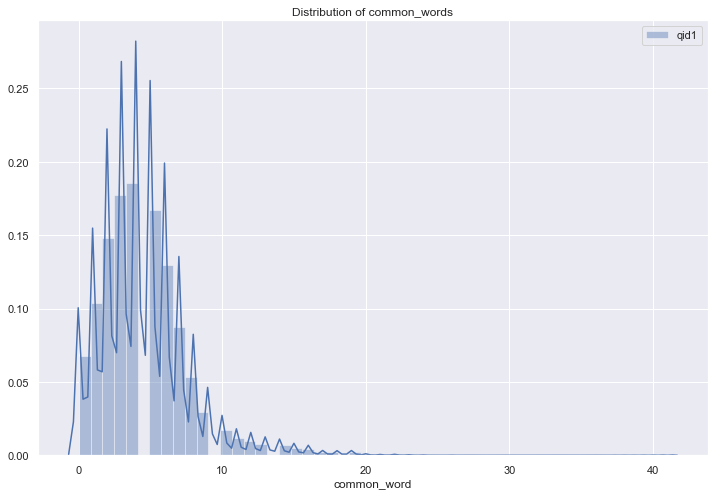

In [45]:
#seeing distrubution
plt.figure(figsize=(12,8))
sns.distplot(df['common_word'],label='qid1')
plt.legend()
plt.title("Distribution of common_words")
plt.show()

<h3>saving data file for further use </h3>

In [46]:
#saving data frame before preprocessing
df.to_csv('for_A_f_e.csv',index=False)